# Declaration of Originality

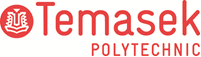

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Muhammad Amirul Irfan Bin Jamal (2404942A)
* Tutorial Group                : P04
* Tutor						    : Mr Emille
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [205]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding

Business problem context:

Pricing a used car is often inconsistent and time-consuming because the final selling price depends on many interacting factors such as brand/model popularity, model year, mileage, fuel type, engine specifications, transmission, accident history, and title status. Buyers may overpay if they lack market knowledge, while sellers may underprice or overprice which leads to longer listing times and lesser inquries. A data driven price estimator can improve transparency and decision-making for both buyers and sellers.

Project objective:

The objective of this project is to build a supervised machine learning model that predicts the used car price based on listing attributes. This model will be deployed through a Streamlit web application that allows users to input vehicle details and receive a predicted price. This simulates a realistic business feature such as a price recommendation tool commonly used by car marketplaces and dealerships.

Target users / stakeholders:

- Buyers: estimate whether a listing is fairly priced before purchasing
- Sellers / dealers: set a competitive listing price to improve sales likelihood
- Marketplace platform: improve listing quality and user trust through price guidance

# 2. Data Understanding

## 2.1 Load dataset

In [206]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "used_cars.csv"
df = pd.read_csv(FILE_PATH)
df ## Display dataframe

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


## 2.2 Summary Statistics

In [207]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [208]:
## Check for missing data
df.isna().sum() ## alternativeL df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [209]:
## Describe data distribution
df.describe(include="all")

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
display(df.isna().sum().sort_values(ascending=False))

clean_title     596
fuel_type       170
accident        113
brand             0
model             0
model_year        0
milage            0
engine            0
transmission      0
ext_col           0
int_col           0
price             0
dtype: int64

In [211]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

# Numeric summary
display(df[num_cols].describe())

# Categorical summary (top categories preview)
display(df[cat_cols].describe(include="object"))


Numeric columns: ['model_year']
Categorical columns: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']


,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,16,3309,52,1037,905,2025,2910,3413,39


I did this to separate the numeric and categorical summaries so that it makes it easier to interpret the dataset.  Numeric columns show ranges (min/max) and central tendency (mean/median), while categorical columns show the number of unique categories and the most frequent values. This helps me to decide what preprocessing is needed.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target (Before)

In [212]:
df["price"].head(10)


0    $10,300
1    $38,005
2    $54,598
3    $15,500
4    $34,999
5    $14,798
6    $31,000
7     $7,300
8    $41,927
9    $69,950
Name: price, dtype: object

I previewed the price column to confirm its raw format. Since the prices contain symbols/commas (stored as text), the values must be cleaned into numeric form before I can plot a meaningful price distribution or train regression models.

In [213]:
df["price"].dtype

dtype('O')

I did this to check the data type of price to confirm whether it is numeric or text. This helps to justify the need for data cleaning before performing target distribution analysis and model training.

### 2.3.1.1 Understanding distribution of target (After Cleaning)

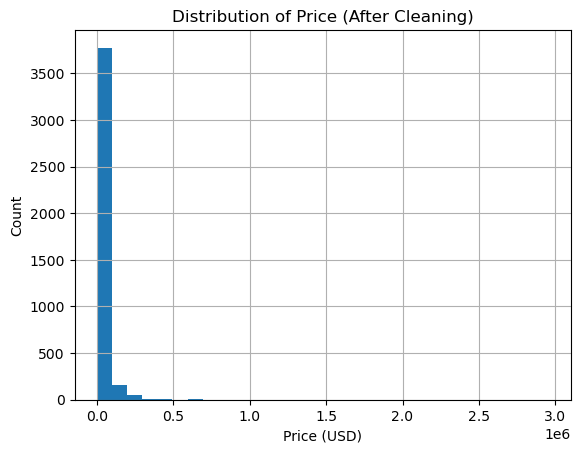

In [214]:
# Plot distribution of target (price) after cleaning
plt.figure()
df_model["price"].hist(bins=30)
plt.title("Distribution of Price (After Cleaning)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()


I plotted this distribution of price after cleaning to understand the overall range and how prices are spread across the dataset. From the histogram, I can see the distribution is highly right-skewed. Most cars are clustered in the lower price ranges, while a small number of listings have extremely high prices, which stretches the x-axis and compresses the main cluster near the left. This tells me that outliers exist in the target variable and may affect model training and evaluation, so I should use a robust metric such as MAE and consider visualising a zoomed view for clearer interpretation.

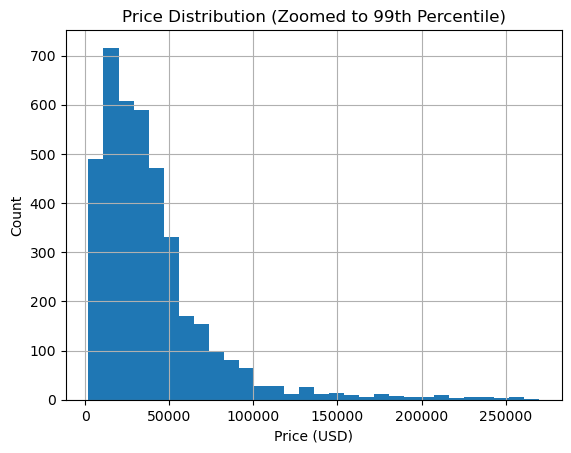

99th percentile price: 272713.2800000002


In [215]:
# Zoom in to see the typical price range (exclude extreme outliers for visualization only)
p99 = df_model["price"].quantile(0.99)

plt.figure()
df_model[df_model["price"] <= p99]["price"].hist(bins=30)
plt.title("Price Distribution (Zoomed to 99th Percentile)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()

print("99th percentile price:", p99)

I plotted this zoomed price distribution using the 99th percentile to reduce the effect of extreme outliers and better visualize the typical price range. From this graph, I can clearly see that most used car prices fall within a lower-to-mid range (many listings concentrated below roughly $50000), with frequencies gradually decreasing as price increases. The long tail up to about $272,713 confirms that higher priced cars exist but are relatively rare.

In [216]:
# Summary statistics for cleaned target
df_model["price"].describe()


count    4.009000e+03
mean     4.455319e+04
std      7.871064e+04
min      2.000000e+03
25%      1.720000e+04
50%      3.100000e+04
75%      4.999000e+04
max      2.954083e+06
Name: price, dtype: float64

I reviewed summary statistics of the cleaned target to quantify its minimum, maximum, median, and spread. This provides concrete evidence of the price range in the dataset and supports decisions such as outlier handling or the need for transformations.

### 2.3.1.2 Understanding distribution of features (Before)

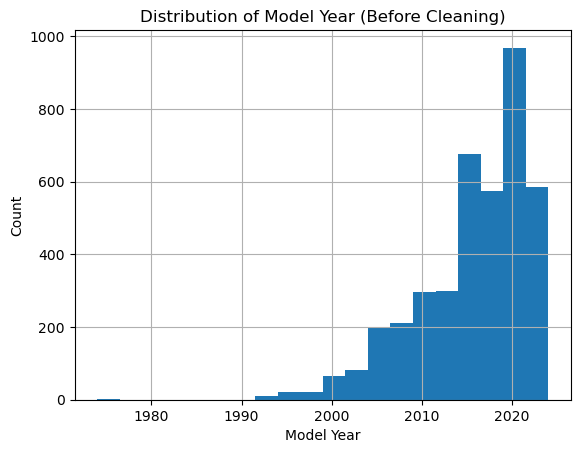

In [217]:
## Understanding distribution of target
## Model year distribution
plt.figure()
df["model_year"].hist(bins=20)
plt.title("Distribution of Model Year (Before Cleaning)")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()

This plot shows the spread of car ages in the dataset and which years are most common. Model year is usually a strong predictor of price, so this helps confirm the dataset contains a reasonable range of vehicle ages and alerts me to any unusual values.

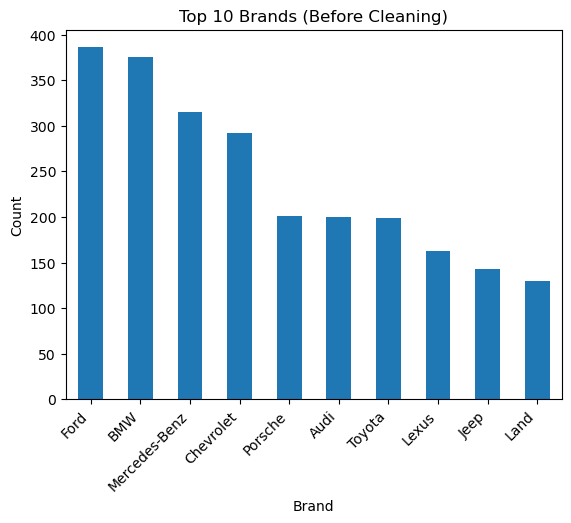

In [218]:
## Understanding distribution of features
## Top 10 brands
top_brands = df["brand"].value_counts().head(10)

plt.figure()
top_brands.plot(kind="bar")
plt.title("Top 10 Brands (Before Cleaning)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()



This shows which brands dominate the dataset. This matters because the model may learn better for brands with more examples and perform worse for rare brands. It also helps plan the Streamlit dropdown choices (common brands will appear more often).

In [219]:
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
})

display(missing_table[missing_table["missing_count"] > 0])


,missing_count,missing_pct
clean_title,596,14.87
fuel_type,170,4.24
accident,113,2.82


I did this step to help me identify which columns have missing data and how severe it is.

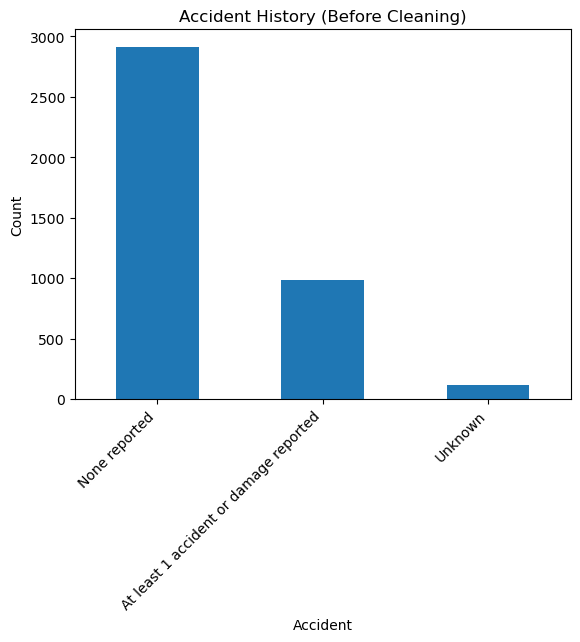

In [220]:
plt.figure()
df["accident"].fillna("Unknown").value_counts().plot(kind="bar")
plt.title("Accident History (Before Cleaning)")
plt.xlabel("Accident")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

Accident history is a real-world factor that can strongly affect resale value. This plot shows how common accident-related records are and whether the column is imbalanced. This helps decide whether the feature is useful and how to treat missing values later.

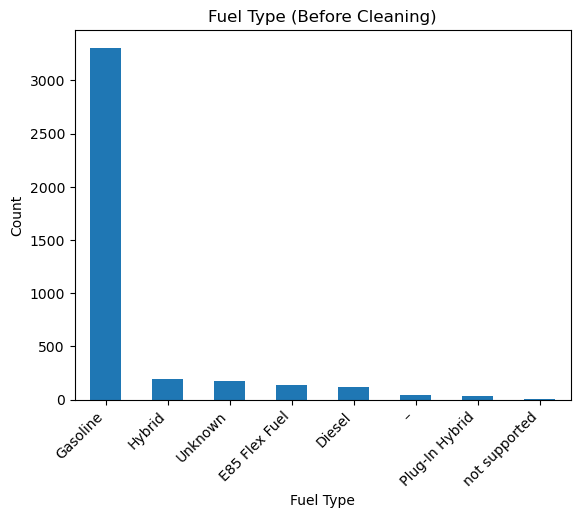

In [221]:
plt.figure()
df["fuel_type"].fillna("Unknown").value_counts().head(10).plot(kind="bar")
plt.title("Fuel Type (Before Cleaning)")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

Fuel type affects price like running costs, demand, and technology. This plot shows the most common fuel categories and whether there are many rare categories. It also confirms this is a categorical feature that will need encoding later.

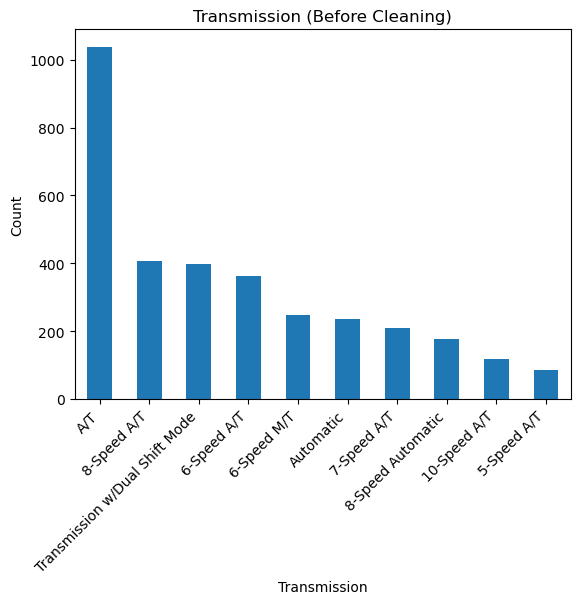

In [222]:
plt.figure()
df["transmission"].fillna("Unknown").value_counts().head(10).plot(kind="bar")
plt.title("Transmission (Before Cleaning)")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

Transmission type can influence price and buyer preference. This helps me see if there are too many unique transmission labels (which can increase the number of encoded features later). If labels are very messy, I may need to standardise or group them.

### 2.3.1.2 Understanding distribution of features (After Cleaning)

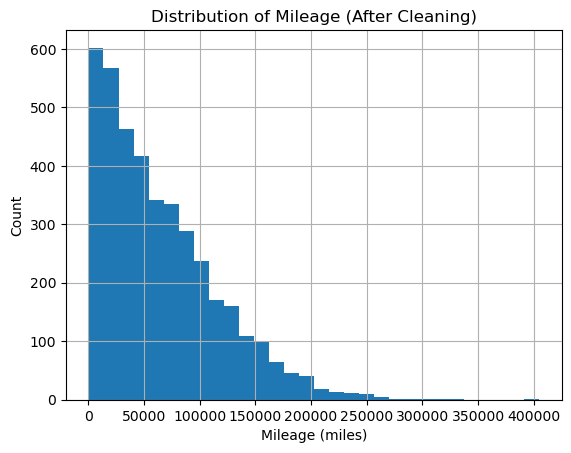

In [223]:
# Plot mileage distribution after cleaning
plt.figure()
df_model["milage"].hist(bins=30)
plt.title("Distribution of Mileage (After Cleaning)")
plt.xlabel("Mileage (miles)")
plt.ylabel("Count")
plt.show()

I plotted this mileage distribution after cleaning it into numeric form to understand how vehicle usage is spread in the dataset and to check for unusual values. From the histogram, mileage is also right-skewed. Many cars have lower to moderate mileage, and the number of cars decreases as mileage increases, with a long tail reaching very high mileage values over 300000 to 400000. This indicates that high-mileage outliers exist, which can influence relationships with price and potentially increase prediction errors. Knowing this helps me interpret later scatter plots for price vs mileage and consider whether visual zooming or outlier handling is needed for modelling.

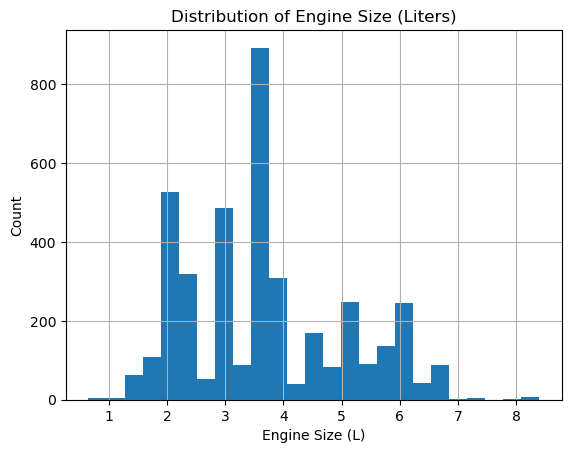

In [224]:
# Plot engine capacity distribution (liters)
plt.figure()
df_model["engine_liters"].hist(bins=25)
plt.title("Distribution of Engine Size (Liters)")
plt.xlabel("Engine Size (L)")
plt.ylabel("Count")
plt.show()

I plotted the distribution of the extracted engine_liters feature to verify that the engine parsing step produced realistic numeric values and to understand common engine sizes in the dataset. From the histogram, engine sizes cluster around a few common ranges for example around 2.0L, ~3.0L, and ~3.5–4.0L which suggests the extraction worked and reflects typical real-world car engines. There are also fewer listings with very large engines (above 6.0L), which are likely higher-performance or luxury vehicles. This supports the idea that engine size is a meaningful feature that could help the model differentiate between economy and premium vehicles.

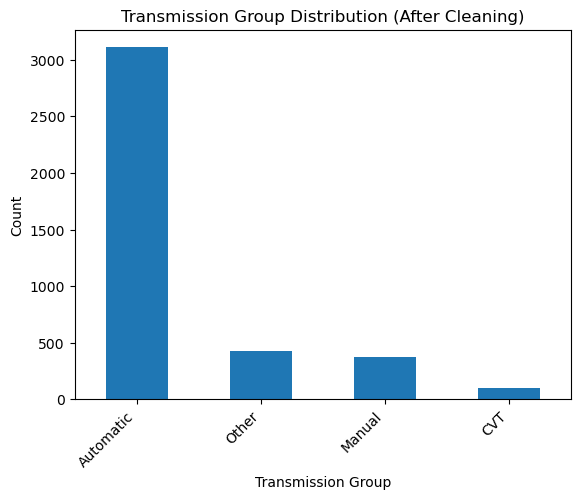

In [225]:
# Check grouped transmission distribution
plt.figure()
df_model["transmission_group"].value_counts().plot(kind="bar")
plt.title("Transmission Group Distribution (After Cleaning)")
plt.xlabel("Transmission Group")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

I visualised this grouped transmission categories to confirm that grouping reduced the number of unique transmission labels into a few interpretable categories. From the bar chart, automatic transmissions dominate the dataset, while manual and CVT appear much less frequently, with a smaller Other category capturing uncommon labels. This tells me the dataset is imbalanced by transmission type, but the grouping successfully simplified the feature and will reduce the number of encoded columns. It also suggests that the model may learn transmission effects more reliably for automatic cars compared to rarer categories, which is important when interpreting model performance.

### 2.3.2 Understanding relationship between variables (Before)

In [226]:
## Understanding relationship between variables
df[["model_year", "price"]].head(10)


,model_year,price
0,2013,"$10,300"
1,2021,"$38,005"
2,2022,"$54,598"
3,2015,"$15,500"
4,2021,"$34,999"
5,2016,"$14,798"
6,2017,"$31,000"
7,2001,"$7,300"
8,2021,"$41,927"
9,2020,"$69,950"


I previewed model_year together with price to check whether both columns are present and to understand the raw format of the target when paired with an important feature. This prepares for relationship analysis after converting price into numeric form.

### 2.3.2 Understanding relationships between variables (After Cleaning)

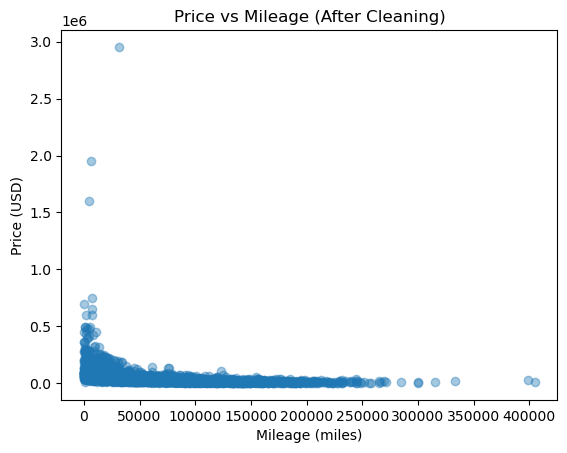

In [227]:
# Relationship between price and mileage
plt.figure()
plt.scatter(df_model["milage"], df_model["price"], alpha=0.4)
plt.title("Price vs Mileage (After Cleaning)")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price (USD)")
plt.show()


This scatter plot helps verify the expected real-world trend: as mileage increases, price generally decreases. It also reveals outliers which may affect model training. This relationship is important because mileage is likely to be one of the strongest predictors of used car price.

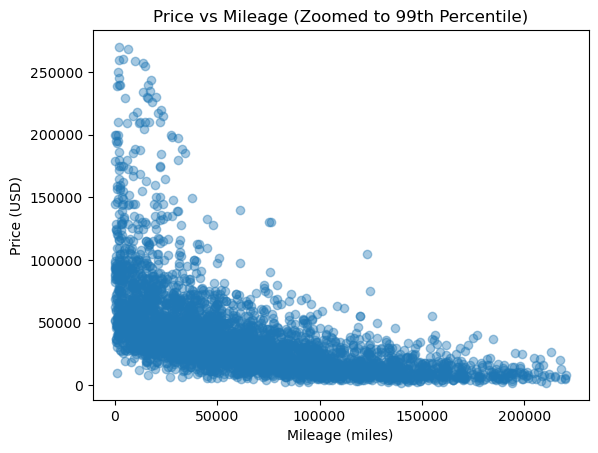

99th percentile price: 272713.2800000002
99th percentile mileage: 222428.00000000015
Zoomed rows: 3927 out of 4009


In [228]:
# Zoom scatter plot to reduce the impact of extreme outliers (visualization only)
p99_price = df_model["price"].quantile(0.99)
p99_milage = df_model["milage"].quantile(0.99)

df_zoom = df_model[(df_model["price"] <= p99_price) & (df_model["milage"] <= p99_milage)]

plt.figure()
plt.scatter(df_zoom["milage"], df_zoom["price"], alpha=0.4)
plt.title("Price vs Mileage (Zoomed to 99th Percentile)")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price (USD)")
plt.show()

print("99th percentile price:", p99_price)
print("99th percentile mileage:", p99_milage)
print("Zoomed rows:", df_zoom.shape[0], "out of", df_model.shape[0])

I created this zoomed scatter plot using the 99th percentile thresholds because a small number of extreme outliers (very high prices and very high mileage) compress the majority of points and make the relationship hard to interpret. From the zoomed plot, I can observe a clearer negative relationship where higher mileage generally corresponds to lower price. I also notice that price varies widely at low mileage, suggesting other factors such as brand, model, engine, accident history, and title status also influence price strongly. This supports using multiple features in the model rather than relying on mileage alone.

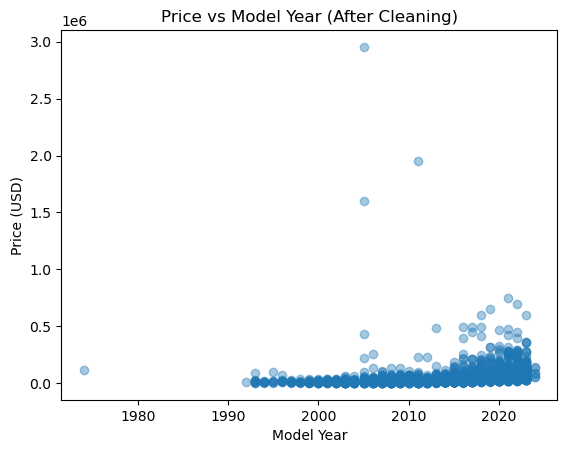

In [229]:
# Scatter plot: Price vs Model Year (full view)
plt.figure()
plt.scatter(df_model["model_year"], df_model["price"], alpha=0.4)
plt.title("Price vs Model Year (After Cleaning)")
plt.xlabel("Model Year")
plt.ylabel("Price (USD)")
plt.show()


I plotted price against model_year to check whether newer cars generally have higher prices, which is an expected real-world trend. From the graph, I can see an overall upward pattern where newer model years tend to have higher prices, but the relationship is compressed because there are a few extreme high-price outliers in the millions that stretch the y-axis. This suggests model year is an important predictor of price, but outliers can distort visual interpretation and may influence model training if not handled carefully.

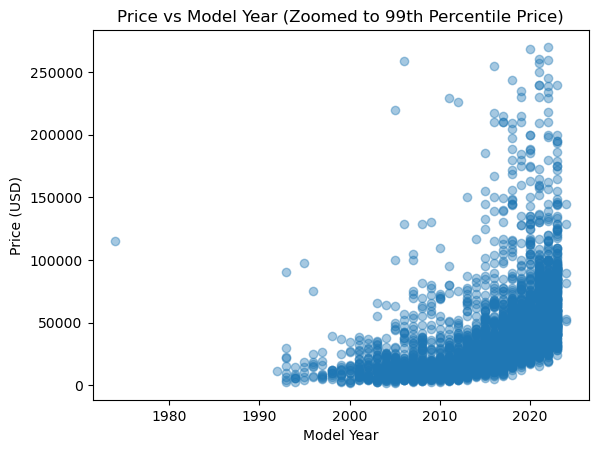

99th percentile price: 272713.2800000002
Rows in zoomed view: 3968 out of 4009


In [230]:
# Zoomed scatter: remove extreme high-price outliers for visualization only
p99_price = df_model["price"].quantile(0.99)
df_price_zoom = df_model[df_model["price"] <= p99_price]

plt.figure()
plt.scatter(df_price_zoom["model_year"], df_price_zoom["price"], alpha=0.4)
plt.title("Price vs Model Year (Zoomed to 99th Percentile Price)")
plt.xlabel("Model Year")
plt.ylabel("Price (USD)")
plt.show()

print("99th percentile price:", p99_price)
print("Rows in zoomed view:", df_price_zoom.shape[0], "out of", df_model.shape[0])


I created this zoomed scatter plot using the 99th percentile price threshold to reduce the effect of extreme outliers and make the main relationship easier to observe. From the zoomed graph, prices increase as model year becomes more recent especially after around the mid-2010s where higher-priced listings become more common. I also notice there is still wide spread in prices for the same model year, which indicates that other features (brand/model, engine details, mileage, accident history, title status) also play a major role in determining price. This supports using multiple features in the final model instead of relying mainly on model year.

<Figure size 640x480 with 0 Axes>

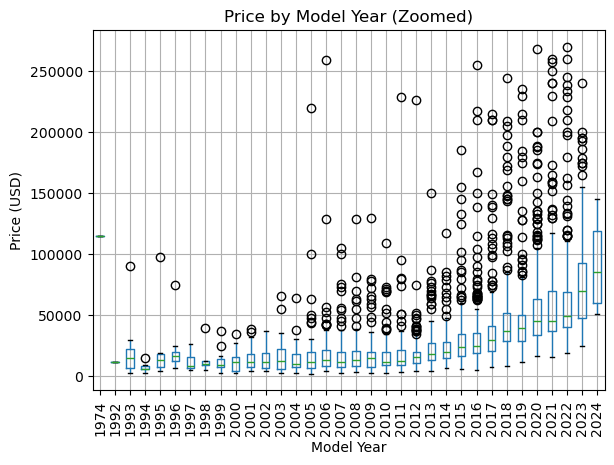

In [231]:
# Boxplot: Price by Model Year (can reveal median trend + outliers)
plt.figure()
df_price_zoom.boxplot(column="price", by="model_year")
plt.title("Price by Model Year (Zoomed)")
plt.suptitle("")  # remove automatic subtitle
plt.xlabel("Model Year")
plt.ylabel("Price (USD)")
plt.xticks(rotation=90)
plt.show()


I used a boxplot to compare the distribution of prices across each model year because it shows the median, spread, and outliers more clearly than a scatter plot. The boxplot shows that the median price generally increases for newer cars, and the price variability (spread) becomes larger in recent years. This suggests that newer vehicles include a wider range of trims/brands and luxury models, which results in both higher typical prices and more high-price outliers. This insight helps justify why the model needs to handle non-linear patterns and why robust evaluation (e.g., MAE) is appropriate when some years contain extreme pricing values.

In [232]:
# Check accident categories and their counts (after cleaning / filling missing)
df_model["accident"].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Unknown                                    113
Name: count, dtype: int64

I displayed this value counts for the accident column to understand how the data is distributed across accident-history categories and to check for class imbalance. From the output, most listings are None reported followed by At least 1 accident or damage reported with a small Unknown group. This tells me the dataset is not evenly distributed, so the model may learn patterns more strongly from the majority group. It also confirms that keeping “Unknown” as a category is reasonable, since it represents a small but real portion of the data rather than removing those rows.

<Figure size 640x480 with 0 Axes>

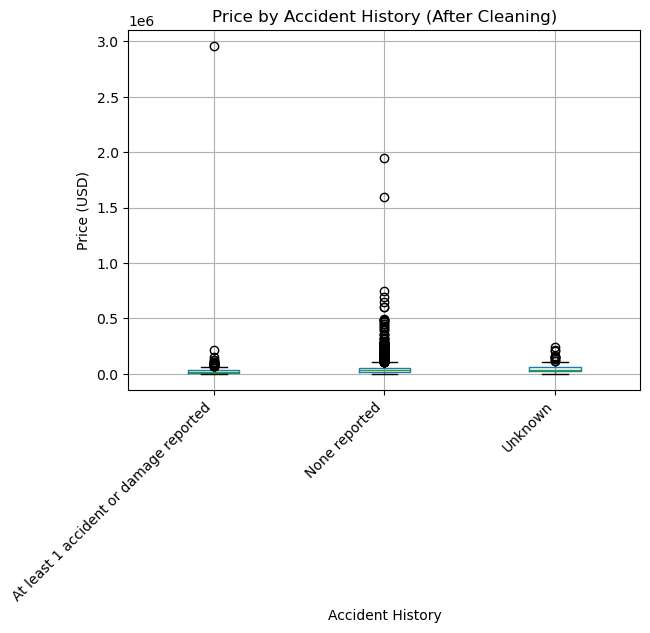

In [233]:
# Boxplot comparing price distribution across accident categories
plt.figure()
df_model.boxplot(column="price", by="accident")
plt.title("Price by Accident History (After Cleaning)")
plt.suptitle("")  # remove automatic subtitle
plt.xlabel("Accident History")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

I plotted a boxplot of price grouped by accident history to compare how prices differ across categories. In the full plot, the y-axis is heavily influenced by a small number of extreme outliers like very highly priced cars which compresses the main price ranges and makes the differences between categories harder to interpret. However, the presence of many outliers confirms that used car prices can vary widely and that extreme prices exist across categories. To understand this better, I will implement another zoomed diagram

<Figure size 640x480 with 0 Axes>

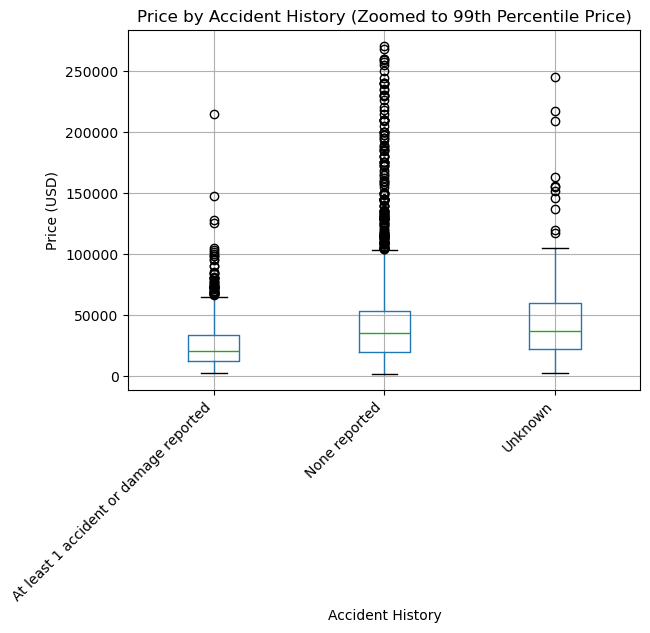

99th percentile price: 272713.2800000002
Rows in zoomed view: 3968 out of 4009


In [234]:
# Zoomed boxplot to reduce impact of extreme price outliers (visualization only)
p99_price = df_model["price"].quantile(0.99)
df_acc_zoom = df_model[df_model["price"] <= p99_price]

plt.figure()
df_acc_zoom.boxplot(column="price", by="accident")
plt.title("Price by Accident History (Zoomed to 99th Percentile Price)")
plt.suptitle("")
plt.xlabel("Accident History")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

print("99th percentile price:", p99_price)
print("Rows in zoomed view:", df_acc_zoom.shape[0], "out of", df_model.shape[0])


I created this zoomed boxplot using the 99th percentile price threshold to reduce the impact of extreme outliers and focus on the typical price range. From the zoomed plot, the price differences between accident categories become clearer. Vehicles with “At least 1 accident or damage reported” generally show a lower typical median price compared to “None reported”, which matches real-world expectations that accident history reduces resale value. The “Unknown” category has fewer samples and shows a wider spread, which may make its trend less reliable. This analysis suggests that accident history is a meaningful feature that can help improve price prediction.

### Short summary of findings for after cleaning the data.

After cleaning, I observed that the target variable price is highly right-skewed due to a small number of extremely expensive listings, so I used zoomed visualizations (99th percentile) to interpret the typical price range more clearly. Feature distributions show that mileage is also right-skewed with some very high-mileage outliers, and extracted engine size values appear realistic and clustered around common engine ranges. Relationship plots indicate that newer model years generally correspond to higher prices, while higher mileage tends to be associated with lower prices, though there is still large price variation within the same year/mileage due to other factors like brand/model, engine and condition. The accident history analysis suggests that cars with reported accidents typically have lower prices than those with none reported. Based on these findings, I will use MAE as the primary evaluation metric because it is interpretable in dollar terms and is more robust to outliers, and I will proceed to model training using multiple features and suitable preprocessing/encoding.

# 3. Data Preparation

## 3.1 Data Cleaning

### 3.1.1 Make a copy for before/after comparison

In [235]:
df_raw = df.copy()
df_raw.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"


I created a copy of the raw dataset so I can compare the dataset before and after cleaning. This helps me demonstrate the impact of cleaning steps clearly and provides evidence that cleaning was necessary.

### 3.1.2 Clean price into numeric

In [236]:
## Clean data
df["price"] = (
    df["price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

df[["price"]].head(3)

,price
0,10300.0
1,38005.0
2,54598.0


The target column price is stored as text with symbols and commas, so it must be converted into numeric format before training a regression model. This ensures the model can learn correctly

### 3.1.3 Clean milage into numeric

In [237]:
df["milage"] = (
    df["milage"]
    .str.replace(",", "", regex=False)
    .str.replace(" mi.", "", regex=False)
    .astype(float)
)

df[["milage"]].head(3)

,milage
0,51000.0
1,34742.0
2,22372.0


Mileage is a key predictor of used car price but it is stored as text with units. Converting it into numeric form allows me to properly do relationship analysis like price vs mileage. It also improves model performance since regression models require numeric inputs.

### 3.1.4 Group transmission

In [238]:
def group_transmission(x):
    if pd.isna(x):
        return "Unknown"
    s = str(x).lower()
    if "manual" in s or "m/t" in s:
        return "Manual"
    if "cvt" in s:
        return "CVT"
    if "auto" in s or "a/t" in s:
        return "Automatic"
    return "Other"

df["transmission_group"] = df["transmission"].apply(group_transmission)
df[["transmission", "transmission_group"]].head(10)

,transmission,transmission_group
0,6-Speed A/T,Automatic
1,8-Speed Automatic,Automatic
2,Automatic,Automatic
3,7-Speed A/T,Automatic
4,8-Speed Automatic,Automatic
5,F,Other
6,6-Speed A/T,Automatic
7,A/T,Automatic
8,6-Speed A/T,Automatic
9,A/T,Automatic


I did this as the transmission column contains many variations of labels, which can create too many categories during encoding. I grouped them into common types (Automatic, Manual, CVT, etc.) so that it reduces dimensionality, improves generalization, and makes the Streamlit input simpler and more user-friendly.

### 3.1.5 Engine feature extraction (liters + cylinders)

In [239]:
import re

def extract_engine_liters(x):
    if pd.isna(x):
        return np.nan
    m = re.search(r"(\d+\.\d+)\s*l", str(x).lower())
    return float(m.group(1)) if m else np.nan

def extract_cylinders(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower()
    m = re.search(r"(\d+)\s*cyl", s)
    if m:
        return float(m.group(1))
    m2 = re.search(r"\bv(\d+)\b", s)  # v6, v8
    if m2:
        return float(m2.group(1))
    m3 = re.search(r"\bi(\d+)\b", s)  # i4
    if m3:
        return float(m3.group(1))
    return np.nan

df["engine_liters"] = df["engine"].apply(extract_engine_liters)
df["engine_cylinders"] = df["engine"].apply(extract_cylinders)

df[["engine", "engine_liters", "engine_cylinders"]].head(10)

,engine,engine_liters,engine_cylinders
0,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,3.7,6.0
1,3.8L V6 24V GDI DOHC,3.8,6.0
2,3.5 Liter DOHC,3.5,NaN
3,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,3.5,6.0
4,2.0L I4 16V GDI DOHC Turbo,2.0,4.0
5,2.4 Liter,2.4,NaN
6,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2.0,4.0
7,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,4.4,8.0
8,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,3.5,6.0
9,534.0HP Electric Motor Electric Fuel System,NaN,NaN


The engine column is a complex text field with many unique values. Instead of encoding the entire string, I extracted key numeric attributes (engine capacity in liters and cylinder count). These features are meaningful in real pricing decisions and reduce the number of categories, making the model more robust and easier to explain.

### 3.1.6 Group exterior color (ext_col)

In [240]:
import re

COLOR_FAMILIES = {
    "Black":  ["black", "ebony", "charcoal"],
    "White":  ["white", "ivory", "pearl"],
    "Silver": ["silver"],
    "Gray":   ["gray", "grey", "graphite"],
    "Blue":   ["blue", "navy"],
    "Red":    ["red", "maroon", "burgundy"],
    "Green":  ["green"],
    "Brown":  ["brown", "bronze", "mocha"],
    "Beige":  ["beige", "tan", "sand", "champagne", "gold"],
    "Yellow": ["yellow"],
    "Orange": ["orange"],
    "Purple": ["purple", "violet"],
}

def group_color(x):
    if pd.isna(x):
        return "Unknown"
    s = str(x).strip().lower()
    s = re.sub(r"[^a-z\s]", " ", s)   # remove punctuation
    s = re.sub(r"\s+", " ", s)        # normalize spaces

    for family, keywords in COLOR_FAMILIES.items():
        for kw in keywords:
            if kw in s:
                return family
    return "Other"

df["ext_color_group"] = df["ext_col"].apply(group_color)

df[["ext_col", "ext_color_group"]].head(15)

,ext_col,ext_color_group
0,Black,Black
1,Moonlight Cloud,Other
2,Blue,Blue
3,Black,Black
4,Glacier White Metallic,White
5,Silver,Silver
6,Blue,Blue
7,Green,Green
8,Black,Black
9,Black,Black


The raw exterior color column contains many variations (e.g., “Pearl White”, “Ivory”, “Off-White”), which increases the number of categories during encoding and makes the model more complex. I grouped exterior colors into common color families to reduce dimensionality, improve generalization, and make the Streamlit dropdown simpler and more user-friendly.

### 3.1.7 Group interior color (int_col)

In [241]:
df["int_color_group"] = df["int_col"].apply(group_color)

df[["int_col", "int_color_group"]].head(15)

,int_col,int_color_group
0,Black,Black
1,Gray,Gray
2,Black,Black
3,Black,Black
4,Black,Black
5,Ebony.,Black
6,Black,Black
7,Green,Green
8,Black,Black
9,Black,Black


Interior colors also contain many unique variations that may not add strong predictive value individually. Grouping them into common color families keeps the information while reducing the number of categories, which can help prevent overfitting and keep the model pipeline manageable.

### 3.1.8 Just checking to see how much I reduced the categories, might remove or xomething

In [242]:
print("Unique exterior colors (raw):", df["ext_col"].nunique(dropna=False))
print("Unique exterior colors (grouped):", df["ext_color_group"].nunique(dropna=False))

print("\nUnique interior colors (raw):", df["int_col"].nunique(dropna=False))
print("Unique interior colors (grouped):", df["int_color_group"].nunique(dropna=False))

Unique exterior colors (raw): 319
Unique exterior colors (grouped): 13

Unique interior colors (raw): 156
Unique interior colors (grouped): 12


### 3.1.9 Create the modeling dataset (selecting final columns)

In [243]:
#keeping only the columns I need for modelling by using engineered/grouped columns
model_cols = [
    "price",                 # target
    "model_year",
    "milage",
    "brand",
    "model",
    "fuel_type",
    "accident",
    "clean_title",
    "transmission_group",
    "engine_liters",
    "engine_cylinders",
    "ext_color_group",
    "int_color_group"
]

df_model = df[model_cols].copy()
df_model.head()


,price,model_year,milage,brand,model,fuel_type,accident,clean_title,transmission_group,engine_liters,engine_cylinders,ext_color_group,int_color_group
0,10300.0,2013,51000.0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,At least 1 accident or damage reported,Yes,Automatic,3.7,6.0,Black,Black
1,38005.0,2021,34742.0,Hyundai,Palisade SEL,Gasoline,At least 1 accident or damage reported,Yes,Automatic,3.8,6.0,Other,Gray
2,54598.0,2022,22372.0,Lexus,RX 350 RX 350,Gasoline,None reported,NaN,Automatic,3.5,NaN,Blue,Black
3,15500.0,2015,88900.0,INFINITI,Q50 Hybrid Sport,Hybrid,None reported,Yes,Automatic,3.5,6.0,Black,Black
4,34999.0,2021,9835.0,Audi,Q3 45 S line Premium Plus,Gasoline,None reported,NaN,Automatic,2.0,4.0,White,Black


I created df_model to keep only the features that are relevant for predicting price and to exclude raw high cardinality text columns that I already simplified like raw engine, raw transmission and raw colors. This makes the dataset cleaner, reduces noise, and ensures the model training step uses a consistent set of inputs.

In [244]:
df_model.isna().sum().sort_values(ascending=False)

clean_title           596
engine_cylinders      440
engine_liters         236
fuel_type             170
accident              113
price                   0
model_year              0
milage                  0
brand                   0
model                   0
transmission_group      0
ext_color_group         0
int_color_group         0
dtype: int64

After selecting the final modelling columns and creating engineered features, I checked for missing values again to confirm which columns still contain nulls and decide what to do with it.

### 3.1.11 Handle missing values

In [245]:
cat_cols = df_model.select_dtypes(include=["object"]).columns
cat_cols

Index(['brand', 'model', 'fuel_type', 'accident', 'clean_title',
       'transmission_group', 'ext_color_group', 'int_color_group'],
      dtype='object')

I identified categorical columns because they cannot be used directly by most machine learning models. These columns also often contain missing values, and a consistent strategy is needed before i can encode it

In [246]:
df_model[cat_cols] = df_model[cat_cols].fillna("Unknown")
df_model[cat_cols].isna().sum().sort_values(ascending=False)

brand                 0
model                 0
fuel_type             0
accident              0
clean_title           0
transmission_group    0
ext_color_group       0
int_color_group       0
dtype: int64

I filled missing categorical values with “Unknown” so that missingness is represented as its own category instead of dropping rows. This keeps more training data and avoids losing potentially useful patterns from being discovered by the machine.

In [247]:
num_cols = df_model.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['price', 'model_year', 'milage', 'engine_liters', 'engine_cylinders'], dtype='object')

I identified numeric columns to check whether any engineered numeric features such as engine liters or cylinders contain any missing values.

In [248]:
for col in num_cols:
    if df_model[col].isna().sum() > 0:
        df_model[col] = df_model[col].fillna(df_model[col].median())

df_model[num_cols].isna().sum().sort_values(ascending=False)

price               0
model_year          0
milage              0
engine_liters       0
engine_cylinders    0
dtype: int64

I filled missing numeric values using the median because it is more robust than the mean when the data contains outliers. This ensures the dataset has no null values and is ready for encoding and model training.

In [249]:
df_model.isna().sum().sum()

np.int64(0)

I peerformed a final missing value check to ensure the dataset is fully cleaned and contains no null values. This is so I can move on with the next step.

## 3.2 Train-Test Split

In [250]:
# Separate target (y) and features (X)
y = df_model["price"]
X = df_model.drop(columns=["price"])

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (4009, 12)
y shape: (4009,)


,model_year,milage,brand,model,fuel_type,accident,clean_title,transmission_group,engine_liters,engine_cylinders,ext_color_group,int_color_group
0,2013,51000.0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,At least 1 accident or damage reported,Yes,Automatic,3.7,6.0,Black,Black
1,2021,34742.0,Hyundai,Palisade SEL,Gasoline,At least 1 accident or damage reported,Yes,Automatic,3.8,6.0,Other,Gray
2,2022,22372.0,Lexus,RX 350 RX 350,Gasoline,None reported,Unknown,Automatic,3.5,6.0,Blue,Black
3,2015,88900.0,INFINITI,Q50 Hybrid Sport,Hybrid,None reported,Yes,Automatic,3.5,6.0,Black,Black
4,2021,9835.0,Audi,Q3 45 S line Premium Plus,Gasoline,None reported,Unknown,Automatic,2.0,4.0,White,Black


I separated the dataset into features X and the target y where price is the value I want to predict. This is required for supervised learning because the model learns a relationship between input features and the target output.

In [251]:
# One-hot encode categorical columns using pandas (labsheet style)
X_encoded = pd.get_dummies(X, drop_first=True)

print("Encoded X shape:", X_encoded.shape)
X_encoded.head()

Encoded X shape: (4009, 1993)


,model_year,milage,engine_liters,engine_cylinders,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,...,int_color_group_Blue,int_color_group_Brown,int_color_group_Gray,int_color_group_Green,int_color_group_Orange,int_color_group_Other,int_color_group_Red,int_color_group_Silver,int_color_group_White,int_color_group_Yellow
0,2013,51000.0,3.7,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,34742.0,3.8,6.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,2022,22372.0,3.5,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,88900.0,3.5,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021,9835.0,2.0,4.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Many features like brand, model, fuel type, transmission group and color groups are categorical and cannot be used directly by most scikit-learn models. I applied one-hot encoding to convert categorical variables into numeric indicator columns. This allows the model to learn the effect of each category on price

In [252]:
## Initialise and train model
from sklearn.model_selection import train_test_split

# Split data into train set and test set
test_size = 0.3
random_state = 2025  # for reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=test_size,
    random_state=random_state
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (2806, 1993) X_test: (1203, 1993)
y_train: (2806,) y_test: (1203,)


# 4. Modelling

### 4.1 Train Model

In [253]:
## Initialise and train model
from sklearn.model_selection import train_test_split

# Split data into train set and test set
test_size = 0.3
random_state = 2025  # for reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=test_size,
    random_state=random_state
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


X_train: (2806, 1993) X_test: (1203, 1993)
y_train: (2806,) y_test: (1203,)


### (1) Base model VS other models

In [254]:
## Baseline model
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Baseline: predict mean of training target
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)

y_pred_base = baseline.predict(X_test)

mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
r2_base = r2_score(y_test, y_pred_base)

print("Baseline MAE:", mae_base)
print("Baseline RMSE:", rmse_base)
print("Baseline R2:", r2_base)

Baseline MAE: 30878.98667058891
Baseline RMSE: 72012.53372447412
Baseline R2: -0.00018010390875122795


I trained this baseline model (DummyRegressor) that predicts the average price from the training set for every car. This baseline provides a minimum performance benchmark, so I can confirm that my machine learning models actually learn useful patterns beyond just guessing approach.

In [255]:
# Model 1: Linear Regression (simple baseline model)
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MAE: 17427.91174944985
Linear Regression RMSE: 68149.98551467886
Linear Regression R2: 0.10423608448029498


I trained a Linear Regression model as a simple baseline machine learning approach to predict price. Linear Regression is interpretable and helps me test whether a linear relationship between the encoded features and price is sufficient. From the results, Linear Regression improves significantly over the baseline mean predictor (lower MAE and positive R2), which shows the features contain useful information. However, the R2 value is relatively low, suggesting that price relationships may not be purely linear and that more flexible models might perform better.

In [256]:
# Model 2: Decision Tree Regressor (simple non-linear model)
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=random_state)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MAE:", mae_dt)
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2:", r2_dt)

Decision Tree MAE: 15758.881961762261
Decision Tree RMSE: 55648.784202601986
Decision Tree R2: 0.40272630407631915


I trained this Decision Tree Regressor as a simple non-linear model to check whether car prices have non-linear patterns that a linear model cannot capture. Used car pricing often depends on interactions between features (e.g., mileage affects price differently depending on model year and brand), and decision trees can model such splits naturally. This model also provides a bridge between a basic linear baseline and the more powerful ensemble model (Random Forest) that I will use later.

From the results, the Decision Tree improves over Linear Regression (lower MAE and higher R²), suggesting that non-linear relationships exist in the dataset. However, its performance is still worse than Random Forest, which is expected because a single tree can overfit to the training data and generalize less reliably.

In [257]:
# Model 3: Random Forest (captures non-linear relationships)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,      # number of trees
    random_state=random_state,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

Random Forest MAE: 12261.730994735384
Random Forest RMSE: 54519.18047285025
Random Forest R2: 0.42672808522917904


I trained a Random Forest Regressor because used-car prices often have non-linear patterns like the effect of mileage differs by model year, brand, or engine size. Random Forest combines many decision trees to capture non-linear relationships and interactions between features. From the results, Random Forest achieved the best performance among the tested models (lowest MAE and RMSE, highest R2). This indicates that non-linear modelling is more suitable for this problem and that the model is learning useful patterns beyond what linear methods can capture.

In [258]:
# Compare all models in one table (including baseline)
results = pd.DataFrame([
    {"Model": "Baseline (Mean)", "MAE": mae_base, "RMSE": rmse_base, "R2": r2_base},
    {"Model": "Linear Regression", "MAE": mae_lr, "RMSE": rmse_lr, "R2": r2_lr},
    {"Model": "Decision Tree", "MAE": mae_dt, "RMSE": rmse_dt, "R2": r2_dt},
    {"Model": "Random Forest", "MAE": mae_rf, "RMSE": rmse_rf, "R2": r2_rf},
]).sort_values(by="MAE")

results


,Model,MAE,RMSE,R2
3,Random Forest,12261.730995,54519.180473,0.426728
2,Decision Tree,15758.881962,55648.784203,0.402726
1,Linear Regression,17427.911749,68149.985515,0.104236
0,Baseline (Mean),30878.986671,72012.533724,-0.000180


I compared all models using MAE, RMSE, and R2 to evaluate how well they predict car prices on unseen test data. The baseline (mean) model performs poorly, confirming that simply predicting an average price is not sufficient. Linear Regression improves over the baseline, showing that the features contain useful predictive signals. The Decision Tree performs better than Linear Regression, which suggests that the relationship between features and price is non-linear.

Among the models tested, Random Forest achieves the best overall performance because of lowest MAE and highest R2. This indicates that combining many decision trees helps capture complex patterns while reducing overfitting compared to a single Decision Tree. Based on this evidence, Random Forest remains the best candidate to continue with feature engineering and hyperparameter tuning for later on.

### Comparison (2) — Random Forest BEFORE vs AFTER Feature Engineering

In [259]:
# Version A: Before feature engineering feature set

basic_cols = [
    "price",        # target
    "model_year",
    "milage",
    "brand",
    "model",
    "fuel_type",
    "accident",
    "clean_title"
]

df_basic = df_model.copy()

# Build basic dataset using only the selected columns
df_basic = df_basic[basic_cols].copy()

# Separate X and y (basic)
y_basic = df_basic["price"]
X_basic = df_basic.drop(columns=["price"])

print("Basic X shape:", X_basic.shape)
print("Basic y shape:", y_basic.shape)
X_basic.head()


Basic X shape: (4009, 7)
Basic y shape: (4009,)


,model_year,milage,brand,model,fuel_type,accident,clean_title
0,2013,51000.0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,At least 1 accident or damage reported,Yes
1,2021,34742.0,Hyundai,Palisade SEL,Gasoline,At least 1 accident or damage reported,Yes
2,2022,22372.0,Lexus,RX 350 RX 350,Gasoline,None reported,Unknown
3,2015,88900.0,INFINITI,Q50 Hybrid Sport,Hybrid,None reported,Yes
4,2021,9835.0,Audi,Q3 45 S line Premium Plus,Gasoline,None reported,Unknown


In [260]:
# One-hot encode Version A (basic features)
X_basic_encoded = pd.get_dummies(X_basic, drop_first=True)

print("Encoded Basic X shape:", X_basic_encoded.shape)
X_basic_encoded.head()


Encoded Basic X shape: (4009, 1965)


,model_year,milage,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,...,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_Unknown,fuel_type_not supported,fuel_type_–,accident_None reported,accident_Unknown,clean_title_Yes
0,2013,51000.0,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,2021,34742.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,2022,22372.0,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,2015,88900.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
4,2021,9835.0,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [261]:
from sklearn.model_selection import train_test_split

# Use same split settings for fair comparison
test_size = 0.3
random_state = 2025

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_basic_encoded,
    y_basic,
    test_size=test_size,
    random_state=random_state
)

print("Xb_train:", Xb_train.shape, "Xb_test:", Xb_test.shape)


Xb_train: (2806, 1965) Xb_test: (1203, 1965)


In [262]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Random Forest on Version A (before feature engineering)
rf_basic = RandomForestRegressor(
    n_estimators=300,
    random_state=random_state,
    n_jobs=-1
)

rf_basic.fit(Xb_train, yb_train)
yb_pred = rf_basic.predict(Xb_test)

mae_rf_basic = mean_absolute_error(yb_test, yb_pred)
rmse_rf_basic = np.sqrt(mean_squared_error(yb_test, yb_pred))
r2_rf_basic = r2_score(yb_test, yb_pred)

print("Random Forest (Before FE) MAE:", mae_rf_basic)
print("Random Forest (Before FE) RMSE:", rmse_rf_basic)
print("Random Forest (Before FE) R2:", r2_rf_basic)

Random Forest (Before FE) MAE: 14785.169685376506
Random Forest (Before FE) RMSE: 53986.83301879523
Random Forest (Before FE) R2: 0.43786874771196094


I trained this Random Forest model using a basic feature set (e.g., model year, mileage, brand/model, fuel type, accident history, clean title) to establish a fair reference point before using additional engineered features. This helps me measure whether feature engineering actually improves performance rather than assuming it does. The model achieves a MAE of about $14785, which shows the basic features already contain useful information for price prediction, but there is still room for improvement.

In [263]:
# Random Forest on Version B (after feature engineering)
rf_after = RandomForestRegressor(
    n_estimators=300,
    random_state=random_state,
    n_jobs=-1
)

rf_after.fit(X_train, y_train)
y_after_pred = rf_after.predict(X_test)

mae_rf_after = mean_absolute_error(y_test, y_after_pred)
rmse_rf_after = np.sqrt(mean_squared_error(y_test, y_after_pred))
r2_rf_after = r2_score(y_test, y_after_pred)

print("Random Forest (After FE) MAE:", mae_rf_after)
print("Random Forest (After FE) RMSE:", rmse_rf_after)
print("Random Forest (After FE) R2:", r2_rf_after)


Random Forest (After FE) MAE: 12261.730994735384
Random Forest (After FE) RMSE: 54519.18047285025
Random Forest (After FE) R2: 0.42672808522917904


I trained the same Random Forest model again, this time using my engineered feature set, which includes features such as extracted engine size/cylinders and grouped categories (e.g., transmission group and color groups). These engineered features are intended to capture important vehicle characteristics in a cleaner and more model-friendly format. After adding engineered features, the MAE improves to about $12262, meaning the predictions are closer to the true prices on average. This shows that feature engineering helped the model learn more useful patterns for predicting used car prices.

In [264]:
# Compare Random Forest before vs after feature engineering
comparison_fe = pd.DataFrame([
    {"Version": "Before Feature Engineering", "MAE": mae_rf_basic, "RMSE": rmse_rf_basic, "R2": r2_rf_basic},
    {"Version": "After Feature Engineering",  "MAE": mae_rf_after, "RMSE": rmse_rf_after, "R2": r2_rf_after},
]).sort_values(by="MAE")

comparison_fe


,Version,MAE,RMSE,R2
1,After Feature Engineering,12261.730995,54519.180473,0.426728
0,Before Feature Engineering,14785.169685,53986.833019,0.437869


I compared the Random Forest model performance before vs after feature engineering to evaluate the impact of the engineered features. The results show a clear improvement in MAE after feature engineering (from $14785 to $12262), indicating that the engineered variables add predictive value and improve the accuracy of price predictions. Although RMSE and R2 may not improve in exactly the same direction due to the presence of outliers and variance in highly priced cars, MAE is my primary metric because it is more interpretable in dollar terms and is less sensitive to extreme values. Based on this comparison, I will proceed with the engineered feature set for subsequent model refinement and hyperparameter tuning.

# 5. Model Evaluation

### 5.1 Evaluate model (on test set)

In [265]:
# Evaluate the best model (Random Forest after feature engineering) on the test set

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_best = y_after_pred  # predictions from rf_after earlier

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Best Model: Random Forest (After FE)")
print("MAE:", mae_best)
print("RMSE:", rmse_best)
print("R2:", r2_best)

Best Model: Random Forest (After FE)
MAE: 12261.730994735384
RMSE: 54519.18047285025
R2: 0.42672808522917904


I evaluated the best-performing model which is the Random Forest after feature engineering on the unseen test set using MAE, RMSE, and R2. MAE is my main metric because it is directly interpretable in dollars (average prediction error). The model achieved an MAE of about $12,262, meaning the predicted prices are typically within $12k of the actual prices on average. RMSE is also reported to reflect how much large errors/outliers affect performance, while R2 indicates how much variance in price the model can explain.

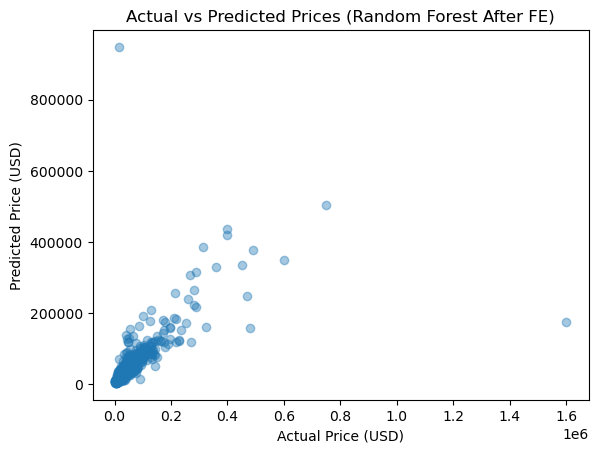

In [266]:
# Visual check: Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred_best, alpha=0.4)
plt.title("Actual vs Predicted Prices (Random Forest After FE)")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.show()

I plotted actual vs predicted prices to visually check model performance. If predictions were correct, points would fall close to a diagonal line (actual ≈ predicted). From the plot, most points cluster in the lower price range and generally follow an upward trend, showing that the model captures the overall relationship between features and price. However, a few high-priced outliers are not predicted as accurately, which is expected because extremely expensive listings are rare and harder for the model to learn from.

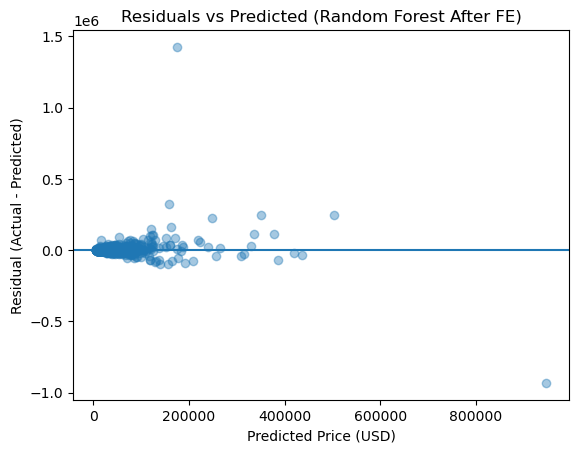

In [267]:
# Residual plot: errors vs predicted values
residuals = y_test - y_pred_best

plt.figure()
plt.scatter(y_pred_best, residuals, alpha=0.4)
plt.title("Residuals vs Predicted (Random Forest After FE)")
plt.xlabel("Predicted Price (USD)")
plt.ylabel("Residual (Actual - Predicted)")
plt.axhline(0)
plt.show()

I plotted residuals (actual − predicted) against predicted prices to inspect error patterns. Ideally, residuals should be randomly scattered around 0, which suggests the model is not systematically overpredicting or underpredicting. In this plot, most residuals cluster near 0 for typical predicted prices, indicating reasonable performance for the majority of cars. The presence of a few very large residuals highlights that extreme outliers (highly priced vehicles) still cause occasional large errors, which is consistent with the skewed price distribution seen during EDA.

### 5.2 New data (create sample input)

In [268]:
# Create a new sample (raw feature format) for prediction
new_car = {
    "brand": "Toyota",
    "model": "Camry",
    "model_year": 2018,
    "milage": 60000,
    "fuel_type": "Gasoline",
    "engine_liters": 2.5,
    "engine_cylinders": 4,
    "transmission_group": "Automatic",
    "ext_color_group": "Black",
    "int_color_group": "Black",
    "accident": "None reported",
    "clean_title": "Yes"
}

new_df = pd.DataFrame([new_car])
new_df

,brand,model,model_year,milage,fuel_type,engine_liters,engine_cylinders,transmission_group,ext_color_group,int_color_group,accident,clean_title
0,Toyota,Camry,2018,60000,Gasoline,2.5,4,Automatic,Black,Black,None reported,Yes


I created a single new car example to simulate how the model would be used in a real scenario (like when a user enters car details in the website/app). The sample includes the same types of features used during training, including the engineered fields (engine size/cylinders and grouped transmission/colors). This step is important because it demonstrates that the model can make predictions on new, unseen inputs rather than only working on the dataset.

### 5.3 Predict

In [269]:
# One-hot encode new data and align columns with training data
new_encoded = pd.get_dummies(new_df, drop_first=True)

# Align to training columns (missing columns -> 0, extra columns -> dropped)
new_encoded_aligned = new_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict
new_price_pred = rf_after.predict(new_encoded_aligned)[0]
print("Predicted Price (USD):", new_price_pred)

Predicted Price (USD): 23134.153333333332


I applied the same preprocessing logic to the new input by one hot encoding it and aligning its columns to match the training feature set. This prevents mismatched feature columns like missing/extra categoriesfrom causing errors during prediction. After alignment, I used the trained Random Forest model to generate a predicted price. The predicted value (about $23134) demonstrates an end-to-end workflow from raw user input -> preprocessing -> model prediction, which is useful for Streamlit deployment later.

## Iterative model development


In [270]:
## Further feature engineering / feature selection
## Hyperparameter tuning (randomizedsearchcv)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter search space (<= 3 values per hyperparameter, as required)
param_dist = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 20, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", 0.5]
}

In [271]:
# RandomizedSearchCV setup
rf_base = RandomForestRegressor(random_state=random_state, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=10,                      # number of random combinations tested
    scoring="neg_mean_absolute_error",
    cv=5,
    random_state=random_state,
    n_jobs=-1,
    verbose=1
)

# Fit on training data (after feature engineering)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV MAE:", -random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
Best CV MAE: 12800.707459825804


I used RandomizedSearchCV to tune the random forest hyperparameters because it is more efficient than gridSearch when there are multiple parameters to test, and it is specifically required in the project specification. I limited each hyperparameter to no more than 3 values to comply with the rules and to keep the search practical within the project timeline. I used 5-fold cross-validation (cv=5) so that the selected parameters are not based on a single train/validation split, making the tuning result more reliable. I also used neg_mean_absolute_error as the scoring metric because MAE is my main business metric (average dollar error), and it is more interpretable and less sensitive to extreme outliers compared to RMSE.

From the tuning results, the best parameter combination found was:

n_estimators = 500 (more trees for stability)
max_depth = None (allow deeper trees to capture non-linear patterns)
max_features = 0.5 (controls randomness / reduces overfitting)
min_samples_split = 2, min_samples_leaf = 1 (allows more detailed splits)

The best cross-validated MAE was about $12,801, which reflects the average validation performance across folds.

In [272]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Best tuned model
rf_tuned = random_search.best_estimator_

# Predict on test set
y_pred_tuned = rf_tuned.predict(X_test)

# Metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Random Forest MAE:", mae_tuned)
print("Tuned Random Forest RMSE:", rmse_tuned)
print("Tuned Random Forest R2:", r2_tuned)

Tuned Random Forest MAE: 12028.949004156275
Tuned Random Forest RMSE: 52039.35989181247
Tuned Random Forest R2: 0.4776929118175888


After finding the best hyperparameters, I evaluated the tuned Random Forest model on the held-out test set to measure real generalization performance. The tuned model achieved a MAE of about $12029, which is lower than the untuned model's MAE ($12262). This indicates the tuning step improved prediction accuracy on unseen data by reducing the typical dollar error. RMSE also improved (decreased), suggesting that the tuned model reduced larger mistakes as well. R2 increased, meaning the tuned model explains more variance in car prices compared to the untuned version.

In [273]:
# Compare best model before tuning vs after tuning (Comparison 3)
comparison_tuning = pd.DataFrame([
    {"Model Version": "Before Tuning (RF After FE)", "MAE": mae_best, "RMSE": rmse_best, "R2": r2_best},
    {"Model Version": "After Tuning (RandomizedSearchCV)", "MAE": mae_tuned, "RMSE": rmse_tuned, "R2": r2_tuned},
]).sort_values(by="MAE")

comparison_tuning

,Model Version,MAE,RMSE,R2
1,After Tuning (RandomizedSearchCV),12028.949004,52039.359892,0.477693
0,Before Tuning (RF After FE),12261.730995,54519.180473,0.426728


I created this comparison table to satisfy the project requirement of showing:
Best model before tuning vs after hyperparameter tuning (Comparison 3).

The results show that RandomizedSearchCV improved the model:

MAE improved from $12262 to $12029

RMSE improved from $54519 to $52039

R2 improved from 0.427 to 0.478


This confirms that hyperparameter tuning provided measurable gains over the best untuned model. Therefore, the tuned Random Forest is selected as the final model for deployment.

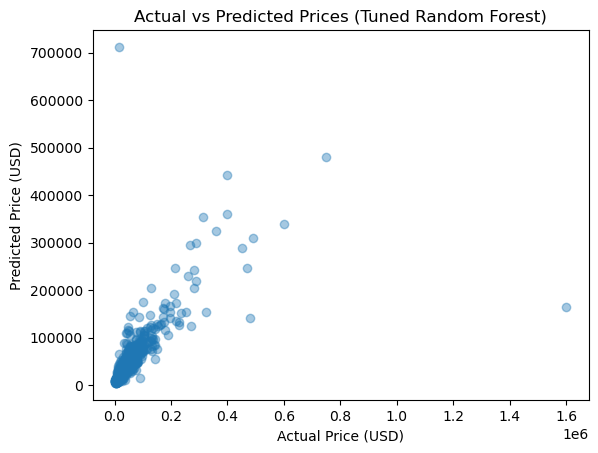

In [274]:
plt.figure()
plt.scatter(y_test, y_pred_tuned, alpha=0.4)
plt.title("Actual vs Predicted Prices (Tuned Random Forest)")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.show()

I plotted actual vs predicted for the tuned model to visually confirm the improvements. Most points still follow an upward trend, showing the model captures the overall relationship between features and price. The tuned model appears slightly tighter in the common price range, meaning predictions are generally closer to actual values for most cars. A small number of extreme high-price outliers still exist, and these remain challenging to predict due to their rarity, but overall the tuned model demonstrates stronger consistency compared to the earlier version.